In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import pytesseract
import math
import warnings
import os
warnings.filterwarnings(action= 'ignore')

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


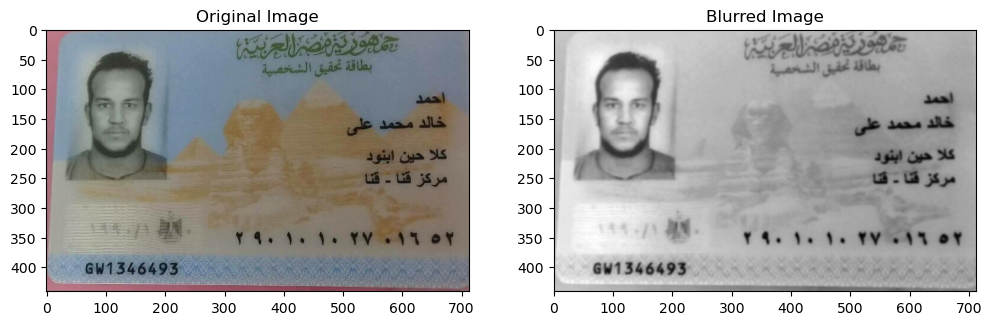

In [3]:
import cv2
def preprocess_and_display(image_path):
    # Read the image
    img = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur
    blured = cv2.GaussianBlur(gray, (7, 7), 0)
    
    # Display the original and blurred images side by side
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(blured, 'gray')
    plt.title('Blurred Image')
    
    plt.show()
    return gray
# Example usage
image_path = "m.jpg"  # Replace with the path to the user's image
blured=preprocess_and_display(image_path)


In [4]:
blured = cv2.GaussianBlur(blured, (5, 5), 0)
edged = cv2.Canny(blured, 30, 150)
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)


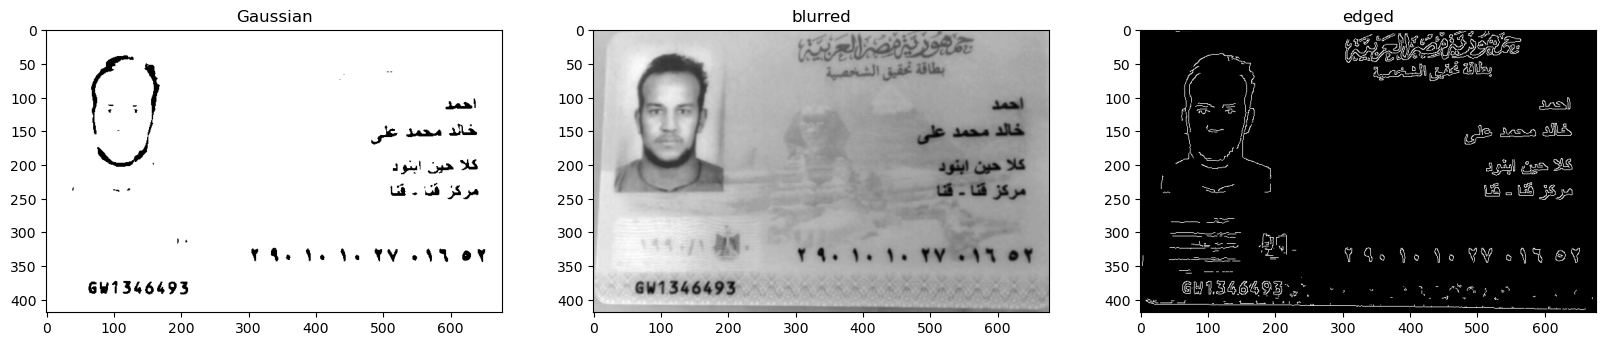

In [5]:
img = cv2.imread(image_path,1)
img = cv2.resize(img,(None),fx=0.95,fy=0.95)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blured = cv2.GaussianBlur(gray, (5, 5), 0)

gaussian = cv2.adaptiveThreshold(blured,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,91,41)

edged = cv2.Canny(gray, 100, 150)
plt.figure(figsize=(20,12))
plt.subplot(131),plt.imshow(gaussian,cmap='gray'),plt.title('Gaussian')
plt.subplot(132),plt.imshow(blured,cmap='gray'),plt.title('blurred')
plt.subplot(133),plt.imshow(edged,cmap='gray'),plt.title('edged')
plt.show()
     


In [6]:
config='--psm 3'
print(pytesseract.image_to_string(gaussian,lang='ara',config=config))


احمد
خالد محمد على

كلا حين ابتود
مركز قنا - قنا

ا ري 17 1ل افا
2005



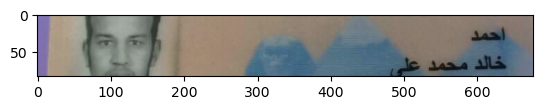

In [7]:
plt.imshow(img[int(img.shape[0]*0.2) : int(img.shape[0]*0.4)])

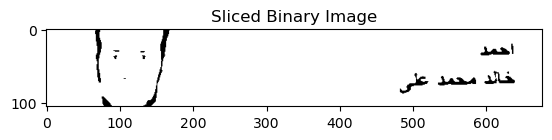

In [8]:
# Assuming binary_image is the result of cv2.threshold
binary_image = cv2.threshold(gaussian, 0, 255, cv2.THRESH_BINARY)[1]

# Slicing the image
start_row = int(img.shape[0] * 0.2)
end_row = int(img.shape[0] * 0.45)
sliced_image = binary_image[start_row:end_row, :]

# Display the sliced binary image
plt.imshow(sliced_image, cmap='gray')
plt.title('Sliced Binary Image')
plt.show()


In [9]:
text1=pytesseract.image_to_string(binary_image[int(img.shape[0]*0.21) : int(img.shape[0]*0.45)],lang='ara')
print(text1)


احمد
خالد محمد على



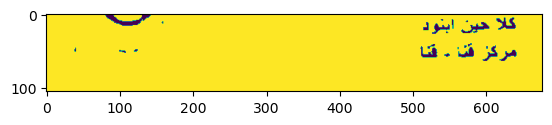

In [10]:
plt.imshow(binary_image[int(img.shape[0]*0.45) : int(img.shape[0]*0.7)])


In [11]:
text2=pytesseract.image_to_string(img[int(img.shape[0]*0.45) : int(img.shape[0]*0.7)],lang='ara')
print(text2)


كلا حين ابنود
مركز قنا - قنا



wu



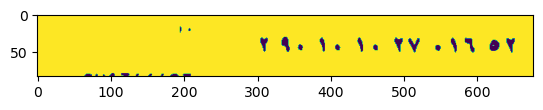

In [12]:
plt.imshow(binary_image[int(img.shape[0]*0.7) : int(img.shape[0]*0.9)])
print(pytesseract.image_to_string(binary_image[int(img.shape[0]*0.7) : int(img.shape[0]*0.8)] ,lang='eng'))


In [13]:
# Split the extracted text into name and address
name1 = text1.split("\n", -1) if "\n" in text1 else (text1, " ")
address1 = text2.split("\n", -1) if "\n" in text2 else (text2, " ")

# Create a DataFrame
columns = ["Name", "Address"]
data = [[name1, address1]]
df = pd.DataFrame(data, columns=columns)
df = df.applymap(lambda x: x.replace('\n', ' ') if isinstance(x, str) else x)


In [14]:
df

,Name,Address
0,"[احمد, خالد محمد على, ]","[كلا حين ابنود, مركز قنا - قنا, ]"
